In [1]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np

data_path='E:/sarcasm_data/sarcasm.json'

In [2]:

with open(data_path,'r') as f:
    datastore = json.load(f)

In [3]:
sentences =[]
labels =[]
 
for items in datastore:
    sentences.append(items['headline'])
    labels.append(items['is_sarcastic'])

In [4]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29657


In [5]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)
print(sentences[0])

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)
former versace store clerk sues over secret 'black code' for minority shoppers


In [6]:
vocab_size = 1000
embedding_dim= 36
max_length=32
trunc_type='post'
padding_type='post'
oov_tok = "<00V>"
training_size = 20000

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type, truncating=trunc_type)


training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 36)            36000     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6918      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 42,925
Trainable params: 42,925
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 10
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 2s 106us/sample - loss: 0.4796 - acc: 0.7467 - val_loss: 0.3705 - val_acc: 0.8301
Epoch 2/10
20000/20000 [==============================] - 2s 75us/sample - loss: 0.3289 - acc: 0.8492 - val_loss: 0.3602 - val_acc: 0.8369
Epoch 3/10
20000/20000 [==============================] - 1s 68us/sample - loss: 0.2936 - acc: 0.8707 - val_loss: 0.3650 - val_acc: 0.8343
Epoch 4/10
20000/20000 [==============================] - 1s 73us/sample - loss: 0.2681 - acc: 0.8835 - val_loss: 0.3793 - val_acc: 0.8317
Epoch 5/10
20000/20000 [==============================] - 1s 69us/sample - loss: 0.2412 - acc: 0.8972 - val_loss: 0.3995 - val_acc: 0.8261
Epoch 6/10
20000/20000 [==============================] - 1s 60us/sample - loss: 0.2133 - acc: 0.9112 - val_loss: 0.4252 - val_acc: 0.8185
Epoch 7/10
20000/20000 [==============================] - 1s 61us/sample - loss: 0.1887 - acc: 0.9231 - val_loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

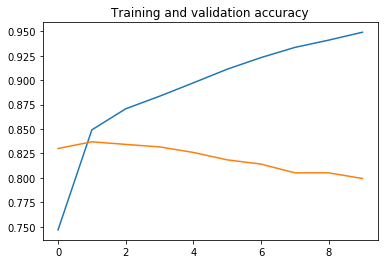

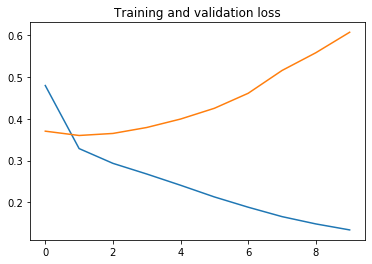

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')